# Pymaceuticals Inc.
---

### Analysis

- There is a positive strong correlation between the size in weight of a mouse and the size of the tumor volume.
- Most mice were treated with either Capomulin or Ramicane.
- Infubinol was the only drug analyzed that had an outlier.
- Capomulin had a smaller variance in final tumor volume than the other three drugs analyzed.
- There was close to an equal divide between male and female test subjects.
  

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

total_data = pd.merge(study_results, mouse_metadata, how="left", on = "Mouse ID")
# Display the data table for preview
total_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
data_mice = total_data["Mouse ID"].unique()
number_mice = len(data_mice)
number_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_dupes = total_data[total_data[["Mouse ID", "Timepoint"]].duplicated() == True]
mice_dupes_id = mice_dupes["Mouse ID"].unique()
mice_dupes_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_dupes_data = total_data.loc[total_data["Mouse ID"] == 'g989',:]
mice_dupes_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=total_data[total_data['Mouse ID'].isin(mice_dupes_id)==False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_df["Mouse ID"].nunique()
clean_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_data = clean_df.set_index(["Drug Regimen"])
group_drug_data = drug_data.groupby("Drug Regimen")
drug_mean = group_drug_data["Tumor Volume (mm3)"].mean()
drug_median = group_drug_data["Tumor Volume (mm3)"].median()
drug_var = group_drug_data["Tumor Volume (mm3)"].var()
drug_std = group_drug_data["Tumor Volume (mm3)"].std()
drug_sem = group_drug_data["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary DataFrame.
drug_reg_sum_df  = pd.DataFrame({"Mean Tumor Volume":  drug_mean,
                                 "Median Tumor Volume":  drug_median,
                                 "Tumor Volume Variance":  drug_var,
                                 "Tumor Volume Std. Dev.":  drug_std,
                                 "Tumor Volume Std. Err.":  drug_sem})
drug_reg_sum_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drug_sum_df = drug_data.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean","median","var","std","sem"])
drug_sum_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

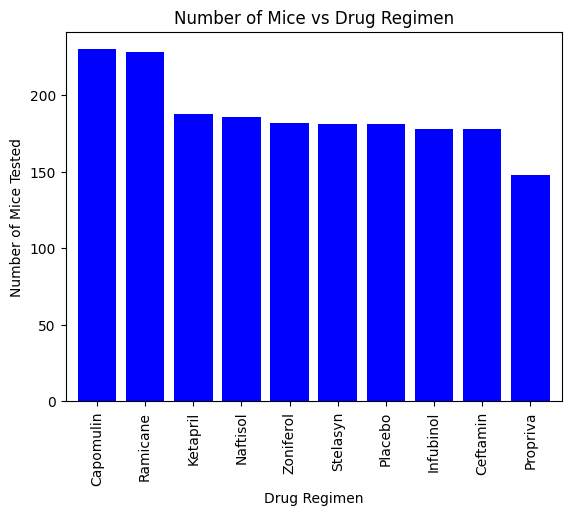

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

mice_and_drugs = clean_df[["Drug Regimen","Timepoint"]]
mice_per_drug = mice_and_drugs["Drug Regimen"].value_counts()
#mice_per_drug
mice_per_drug.plot(kind="bar",width =0.8, color = 'blue',
                  xlabel="Drug Regimen",
                  ylabel="Number of Mice Tested",
                  title = "Number of Mice vs Drug Regimen")

plt.show()

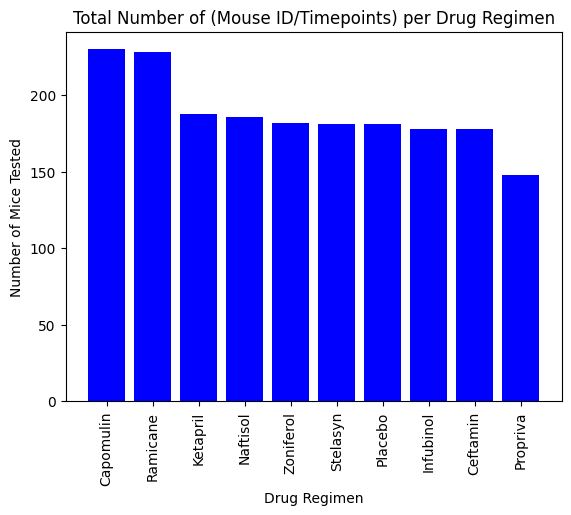

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drugs = mice_per_drug.index.values
count = mice_per_drug.values
plt.bar(drugs, count, color="b", align="center",width = 0.8)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.title('Total Number of (Mouse ID/Timepoints) per Drug Regimen')
plt.xticks(rotation=90)
plt.show()


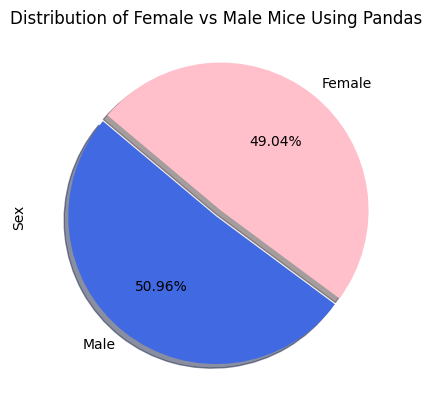

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_vs_female = clean_df["Sex"].value_counts()
Sex = ["Male", "Female"]
colors=['royalblue','pink']
plt.title('Distribution of Female vs Male Mice Using Pandas')
explode=(0,0.05)
male_vs_female.plot(kind = "pie" , autopct="%1.2f%%", ylabel = "Sex",startangle=140,
                    shadow = True,colors=colors,explode = explode)
plt.show()

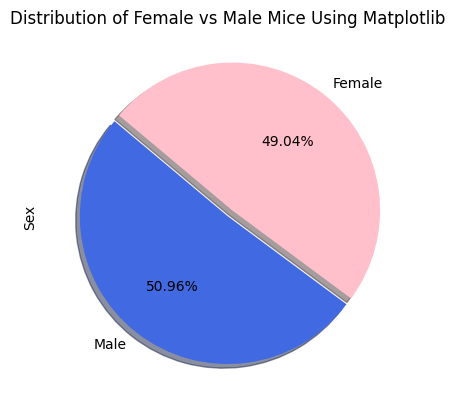

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_label = male_vs_female.index.values
count_value = male_vs_female.values
colors=['royalblue','pink']
explode=(0,0.05)
plt.ylabel("Sex")
plt.title('Distribution of Female vs Male Mice Using Matplotlib')
plt.pie(count_value, labels = sex_label, autopct="%1.2f%%",shadow = True,colors = colors,
        explode=explode,startangle=140)
plt.show()


In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []
for drug in drugs: 
    temp_df = clean_df.loc[clean_df['Drug Regimen'] == drug]
    # Start by getting the last (greatest) timepoint for each mouse
    temp_last = temp_df.groupby('Mouse ID').max()['Timepoint']
    temp_last_df = pd.DataFrame(temp_last)
    # Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
    temp_last_merged = pd.merge(temp_last_df, clean_df, on=("Mouse ID","Timepoint"),how="left")
    # Create lists that consists of all final volume values for each regimen
    values = temp_last_merged['Tumor Volume (mm3)']
    tumor_volume.append(values)
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = round((upperq-lowerq),2)
    print('------------------------------------')
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    print(f'IQR for {drug}: {iqr}')
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')
    
   # Determine outliers using upper and lower bounds
    outliers_value = (values.loc[(temp_last_merged['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (temp_last_merged['Tumor Volume (mm3)'] <= lower_bound)])
    print(f"{drug}'s potential outliers: {outliers_value}")
 

------------------------------------
IQR for Capomulin: 7.78
Lower Bound for Capomulin: 20.71
Upper Bound for Capomulin: 51.83
Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
------------------------------------
IQR for Ramicane: 9.1
Lower Bound for Ramicane: 17.91
Upper Bound for Ramicane: 54.31
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
------------------------------------
IQR for Infubinol: 11.48
Lower Bound for Infubinol: 36.83
Upper Bound for Infubinol: 82.75
Infubinol's potential outliers: 5    36.321346
Name: Tumor Volume (mm3), dtype: float64
------------------------------------
IQR for Ceftamin: 15.58
Lower Bound for Ceftamin: 25.35
Upper Bound for Ceftamin: 87.67
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


## Quartiles, Outliers and Boxplots

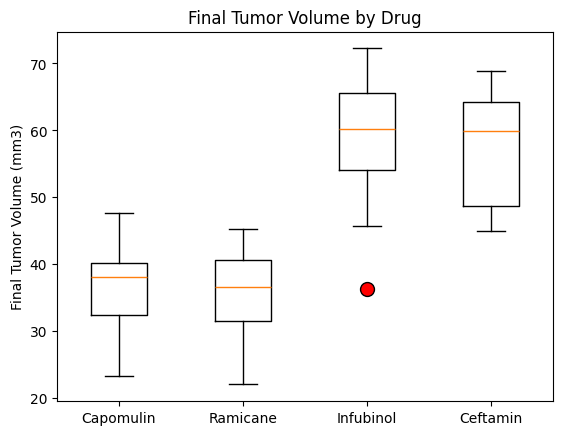

In [14]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_volume, flierprops=dict(marker='o', markerfacecolor='r', markersize=10, markeredgecolor='black'))
plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()


## Line and Scatter Plots

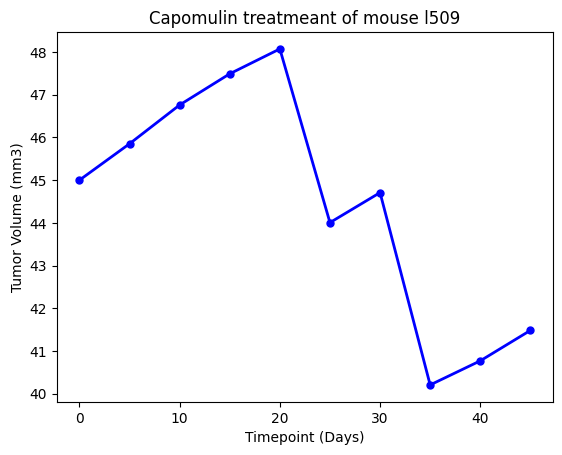

In [15]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
mouse_l509_df = clean_df.loc[clean_df["Mouse ID"] == "l509",:]
x_axis = mouse_l509_df["Timepoint"]
y_axis = mouse_l509_df["Tumor Volume (mm3)"]
fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, y_axis,linewidth=2, markersize=5,marker="o",color="blue", label="Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

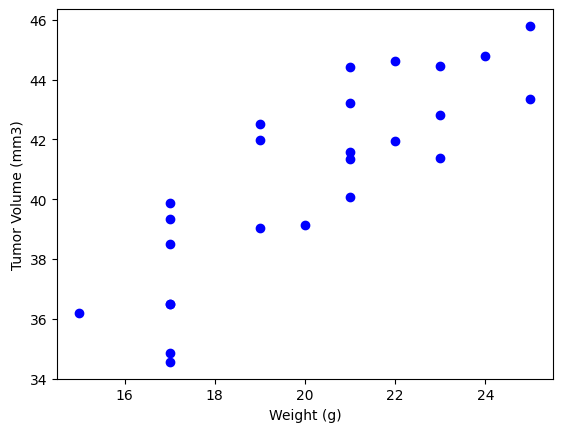

In [16]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

group_capomulin_df = capomulin_df.groupby("Mouse ID")
avg_tumor_vol = group_capomulin_df[("Tumor Volume (mm3)")].mean()
weight = group_capomulin_df["Weight (g)"].mean()
plt.scatter(weight, avg_tumor_vol,color = 'b')
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between weight and average tumor volume
on the Capomulin regimen is 0.84.


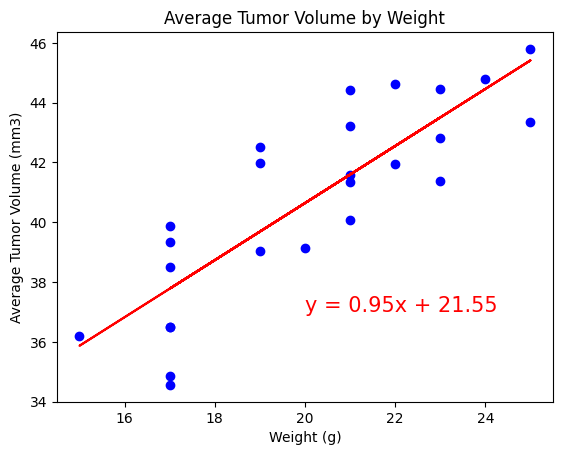

In [17]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x = weight
y = avg_tumor_vol
correlation = st.pearsonr(x,y)
print(f"""The correlation between weight and average tumor volume
on the Capomulin regimen is {round(correlation[0],2)}.""")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr)=st.linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y,color ='b')
plt.plot(x,regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(20,37),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()